In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, make_scorer
from sklearn.datasets import make_classification
from sklearn.utils.multiclass import unique_labels
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# import plotly.graph_objects as go

#### Features


In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Get feature names from the file features.txt
features = []
with open(r'D:\Adeel\UCI HAR Dataset\features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

print('No of Features:', len(features))

# Handle duplicated features by renaming
seen = set()
uniq_features = []
for idx, x in enumerate(features):
    if x not in seen:
        uniq_features.append(x)
        seen.add(x)
    elif x + 'n' not in seen:
        uniq_features.append(x + 'n')
        seen.add(x + 'n')
    else:
        uniq_features.append(x + 'nn')
        seen.add(x + 'nn')

No of Features: 561


#### Training data


In [3]:
X_train = pd.read_csv(r'D:\Adeel\UCI HAR Dataset\train\X_train.txt', sep='\s+', header=None, names=uniq_features)

# Add subject column to the dataframe
X_train['subject'] = pd.read_csv(r'D:\Adeel\UCI HAR Dataset\train\subject_train.txt', header=None)

# Read training labels and map activity labels to activity names
y_train = pd.read_csv(r'D:\Adeel\UCI HAR Dataset\train\y_train.txt', names=['Activity'])
activity_map = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS',
                4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
y_train_labels = y_train['Activity'].replace(activity_map)

# Combine training data into a single DataFrame
X_train['Activity'] = y_train
X_train['ActivityName'] = y_train_labels

#### Testing data


In [4]:
X_test_cv = pd.read_csv(r'D:\Adeel\UCI HAR Dataset\test\X_test.txt', sep='\s+', header=None, names=uniq_features)

# Add subject column to the dataframe
X_test_cv['subject'] = pd.read_csv(r'D:\Adeel\UCI HAR Dataset\test\subject_test.txt', header=None)

# Read testing labels and map activity labels to activity names
y_test_cv = pd.read_csv(r'D:\Adeel\UCI HAR Dataset\test\y_test.txt', names=['Activity'])
y_test_cv_labels = y_test_cv['Activity'].replace(activity_map)

# Combine testing data into a single DataFrame
X_test_cv['Activity'] = y_test_cv
X_test_cv['ActivityName'] = y_test_cv_labels

#### Cross-Validation



In [5]:
X_cv, X_test, y_cv, y_test = train_test_split(X_test_cv, y_test_cv, test_size=0.5, random_state=42)

#### Complete dataset


In [6]:
print(f'X_train Shape: {X_train.shape}') 
print(f'X_Cv Shape: {X_cv.shape}')
print(f'X_test Shape: {X_test.shape}')

X_train Shape: (7352, 564)
X_Cv Shape: (1473, 564)
X_test Shape: (1474, 564)


#### Checking Duplicates


In [7]:
print('No of duplicates in train: {}'.format(sum(X_train.duplicated())))
print('No of duplicates in cv: {}'.format(sum(X_cv.duplicated())))
print('No of duplicates in test : {}'.format(sum(X_test.duplicated())))

No of duplicates in train: 0
No of duplicates in cv: 0
No of duplicates in test : 0


#### Checking for NaN/null values

In [8]:
print('We have {} NaN/Null values in train'.format(X_train.isnull().values.sum()))
print('We have {} NaN/Null values in train'.format(X_cv.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(X_test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


#### Checking for Data Imbalances

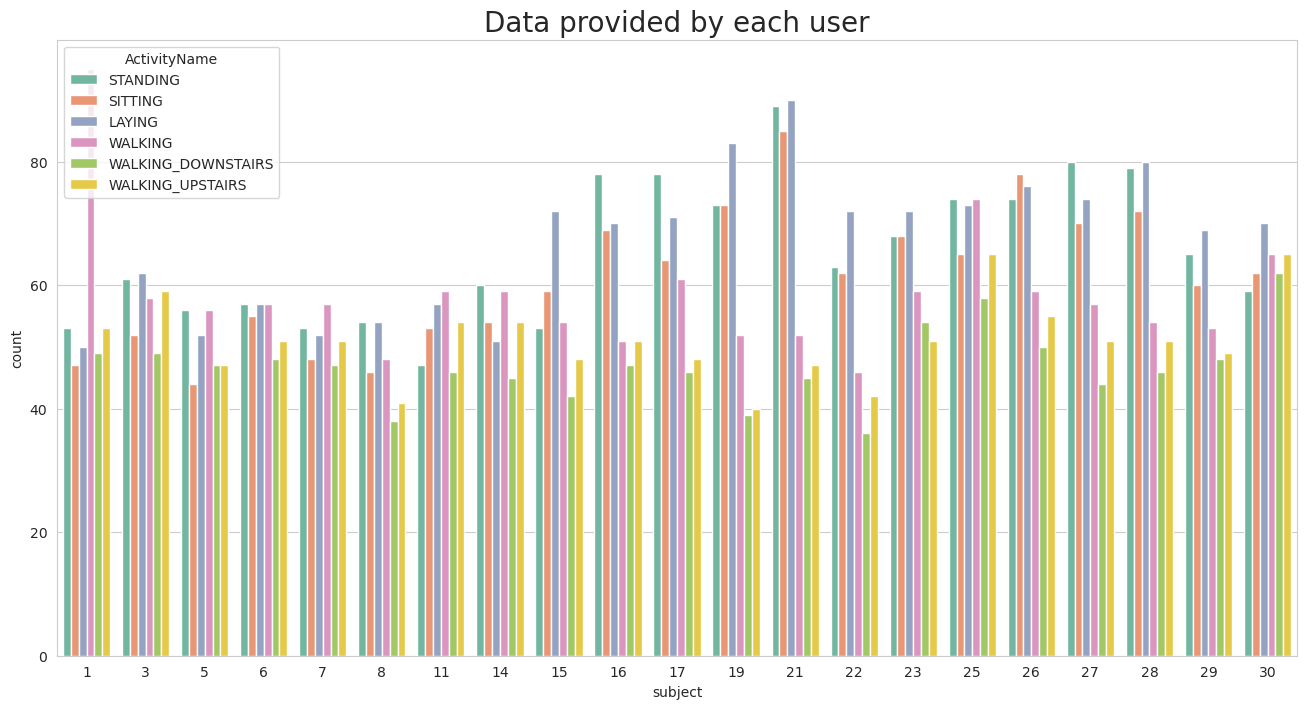

In [9]:
sns.set_style('whitegrid')
custom_palette = sns.color_palette('Set2', 6)  # Choose only 6 colors from Set2 palette
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16, 8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject', hue='ActivityName', data=X_train, palette=custom_palette)
plt.show()


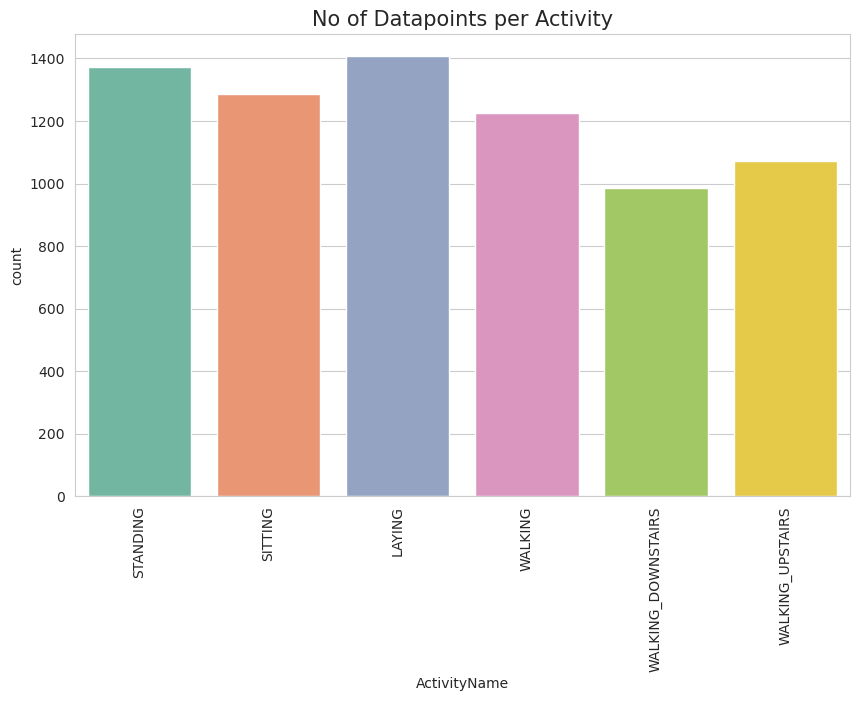

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and font family
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
custom_palette = sns.color_palette('Set2', n_colors=6)  # Adjust the number of colors to match your needs

# Create the plot
plt.figure(figsize=(10, 6))
plt.title('No of Datapoints per Activity', fontsize=15)

# Plot the countplot with x='ActivityName' as hue
sns.countplot(x='ActivityName', data=X_train, hue='ActivityName', palette=custom_palette, dodge=False, legend=False)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [11]:
#Changing feature names

columns = X_train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

X_train.columns = columns
X_cv.columns = columns
X_test.columns = columns

X_test.columns


X_train.to_csv(r'D:\Adeel\UCI HAR Dataset\Train.csv', index=False)
X_cv.to_csv(r'D:\Adeel\UCI HAR Dataset\CV.csv', index=False)
X_test.to_csv(r'D:\Adeel\UCI HAR Dataset\Test.csv', index=False)

In [12]:
def read_data(file):
    data = pd.read_csv(file)
    
    # suffle data
    data = sklearn.utils.shuffle(data)
    
    X_data = data.drop(['subject', 'Activity', 'ActivityName'], axis=1)
    y_data = data.ActivityName
    
    return np.array(X_data), np.array(y_data)

train_X, train_y = read_data(r'D:\Adeel\UCI HAR Dataset\Train.csv')
cv_X, cv_y = read_data(r'D:\Adeel\UCI HAR Dataset\CV.csv')
test_X, test_y = read_data(r'D:\Adeel\UCI HAR Dataset\Test.csv')

In [13]:
# Activity mapping dictionary
activity_map = {'WALKING': 1, 'WALKING_UPSTAIRS': 2, 'WALKING_DOWNSTAIRS': 3,
                'SITTING': 4, 'STANDING': 5, 'LAYING': 6}

# Define a function to apply the mapping
map_func = np.vectorize(lambda x: activity_map[x])

# Apply the mapping function
train_y = map_func(train_y)
cv_y = map_func(cv_y)
test_y = map_func(test_y)

In [14]:
print(f'train_X Shape: {train_X.shape}') 
print(f'cv_X Shape: {cv_X.shape}')
print(f'test_X Shape: {test_X.shape}')
print(f'train_y Shape: {train_y.shape}') 
print(f'cv_y Shape: {cv_y.shape}')
print(f'test_y Shape: {test_y.shape}')



train_X Shape: (7352, 561)
cv_X Shape: (1473, 561)
test_X Shape: (1474, 561)
train_y Shape: (7352,)
cv_y Shape: (1473,)
test_y Shape: (1474,)


#### Decision Tree
###### We will follow following steps: 
###### 1. Identify Minimum split of samples 
###### 2. Identify Max Depth of Tree 
###### Our metric will be 'Accuracy'

In [15]:
min_samples_split_list =  [2, 10, 30, 50, 100, 200, 300, 700, 1000, 1500, 2500, 4500, 7000, 11000] 
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 42).fit(train_X,train_y) 
    predictions_train = model.predict(train_X) 
    predictions_val = model.predict(cv_X) 
    accuracy_train = accuracy_score(predictions_train,train_y)
    accuracy_val = accuracy_score(predictions_val,cv_y)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=min_samples_split_list,
    y=accuracy_list_train,
    mode='lines+markers',
    name='Train Accuracy',
    marker=dict(size=8, symbol='circle')
))

fig.add_trace(go.Scatter(
    x=min_samples_split_list,
    y=accuracy_list_val,
    mode='lines+markers',
    name='Validation Accuracy',
    marker=dict(size=8, symbol='circle')
))

fig.update_layout(
    title='Train vs Validation Metrics',
    xaxis_title='min_samples_split',
    yaxis_title='Accuracy',
    xaxis=dict(
        type='log',  
        tickmode='array',
        tickvals=min_samples_split_list,
        ticktext=[str(val) for val in min_samples_split_list] 
    ),
    legend=dict(x=0.01, y=0.99, traceorder='normal'),
    template='plotly_white'
)

# Display the plot
pio.show(fig)

In [16]:
max_depth_list = [1, 2, 3, 4, 8, 10, 16, 32, 64, 128, None]
accuracy_list_train = []
accuracy_list_val = []

# Evaluate model for different max_depth values
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42).fit(train_X, train_y)
    predictions_train = model.predict(train_X)
    predictions_val = model.predict(cv_X)
    accuracy_train = accuracy_score(predictions_train, train_y)
    accuracy_val = accuracy_score(predictions_val, cv_y)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

# Create the interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=max_depth_list,
    y=accuracy_list_train,
    mode='lines+markers',
    name='Train Accuracy',
    marker=dict(size=8, symbol='circle')
))

fig.add_trace(go.Scatter(
    x=max_depth_list,
    y=accuracy_list_val,
    mode='lines+markers',
    name='Validation Accuracy',
    marker=dict(size=8, symbol='circle')
))

# Update layout to improve readability
fig.update_layout(
    title='Train vs Validation Metrics',
    xaxis_title='max_depth',
    yaxis_title='Accuracy',
    xaxis=dict(
        tickmode='array',
        tickvals=max_depth_list,
        ticktext=[str(val) for val in max_depth_list]  # Customize tick labels
    ),
    legend=dict(x=0.01, y=0.99, traceorder='normal'),
    template='plotly_white'
)

# Display the plot
pio.show(fig)

#### For Single Decision Tree

In [17]:
max_depth = 16
min_samples_split = 1000

decision_tree_model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                             max_depth = max_depth,
                                             random_state = 42).fit(train_X,train_y)
# Make predictions
predictions_train = decision_tree_model.predict(train_X)
probabilities_train = decision_tree_model.predict_proba(train_X)
predictions_val = decision_tree_model.predict(cv_X)
probabilities_val = decision_tree_model.predict_proba(cv_X)

In [18]:
max_depth = 16
min_samples_split = 1000

decision_tree_model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                             max_depth = max_depth,
                                             random_state = 42).fit(train_X,train_y)

# Make predictions
predictions_train = decision_tree_model.predict(train_X)
probabilities_train = decision_tree_model.predict_proba(train_X)

predictions_val = decision_tree_model.predict(cv_X)
probabilities_val = decision_tree_model.predict_proba(cv_X)

# Calculate various metrics
accuracy_train = accuracy_score(train_y, predictions_train)
accuracy_val = accuracy_score(cv_y, predictions_val)

precision_train = precision_score(train_y, predictions_train, average='weighted', zero_division=0)
precision_val = precision_score(cv_y, predictions_val, average='weighted', zero_division=0)

recall_train = recall_score(train_y, predictions_train, average='weighted', zero_division=0)
recall_val = recall_score(cv_y, predictions_val, average='weighted', zero_division=0)

f1_train = f1_score(train_y, predictions_train, average='weighted', zero_division=0)
f1_val = f1_score(cv_y, predictions_val, average='weighted', zero_division=0)

roc_auc_train = roc_auc_score(train_y, probabilities_train, multi_class='ovr')
roc_auc_val = roc_auc_score(cv_y, probabilities_val, multi_class='ovr')

conf_matrix_train = confusion_matrix(train_y, predictions_train)
conf_matrix_val = confusion_matrix(cv_y, predictions_val)

metrics_train = [accuracy_train,precision_train,recall_train,f1_train,roc_auc_train]
metrics_val = [accuracy_val,precision_val,recall_val,f1_val,roc_auc_val]

#### Defining functions for prinint and plotting

In [19]:
def print_metrics(y_true, y_pred, y_proba, set_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    roc_auc = roc_auc_score(y_true, y_proba, multi_class='ovr')

    print(f"Metrics {set_name}:")
    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tPrecision: {precision:.4f}")
    print(f"\tRecall: {recall:.4f}")
    print(f"\tF1 score: {f1:.4f}")
    print(f"\tROC AUC: {roc_auc:.4f}")
  
    
# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'] 
# Define function to plot metrics
def plot_metrics_comparison(metrics_train, metrics_val, metric_names):
    if len(metrics_train) != len(metrics_val) or len(metrics_train) != len(metric_names):
        raise ValueError("All input lists must have the same length.")

    n_metrics = len(metrics_train)
    bar_width = 0.35
    index = np.arange(n_metrics)

    fig, ax = plt.subplots(figsize=(10, 6))
    bar_train = ax.bar(index, metrics_train, bar_width, label='Train')
    bar_val = ax.bar(index + bar_width, metrics_val, bar_width, label='Validation')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Metrics for Train and Validation Sets')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(metric_names)
    ax.legend()

    # Add data labels to the bars
    for bar in bar_train:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height*100:.3f}', ha='center', va='bottom')

    for bar in bar_val:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height*100:.3f}', ha='center', va='bottom')

    plt.show()


#### Results for Single Decision Tree

Metrics Train:
	Accuracy: 0.9082
	Precision: 0.9133
	Recall: 0.9082
	F1 score: 0.9092
	ROC AUC: 0.9879


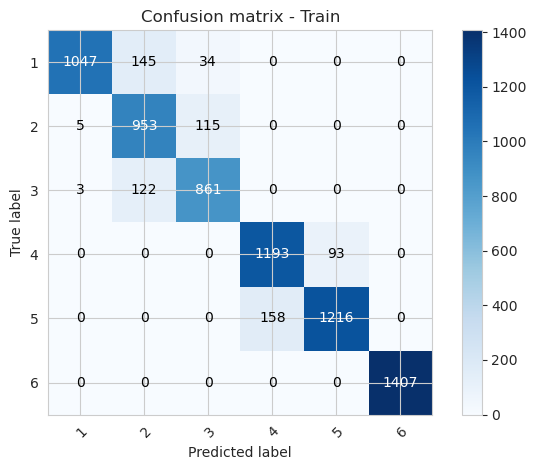

Metrics Cross Validation:
	Accuracy: 0.8337
	Precision: 0.8456
	Recall: 0.8337
	F1 score: 0.8355
	ROC AUC: 0.9737


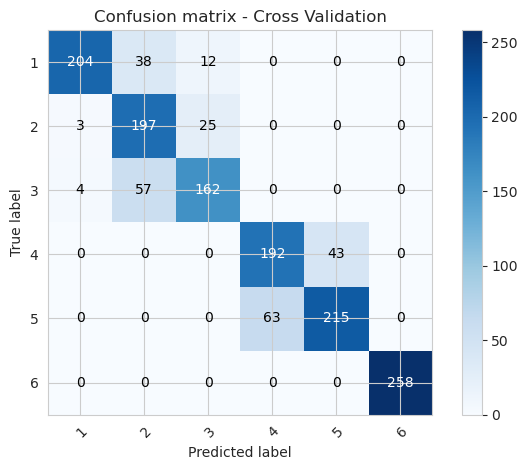

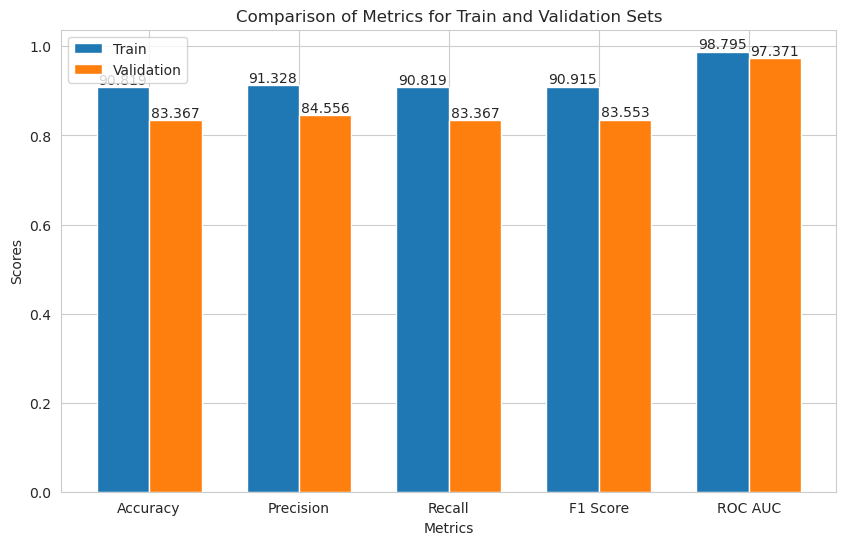

In [20]:
# Print metrics and plot confusion matrix for training set
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

print_metrics(train_y, predictions_train,probabilities_train,"Train")
plot_confusion_matrix(train_y, predictions_train, unique_labels(train_y, predictions_train), title=f'Confusion matrix - Train')

# Print metrics and plot confusion matrix for validation set
print_metrics(cv_y, predictions_val,probabilities_val,"Cross Validation")
plot_confusion_matrix(cv_y, predictions_val, unique_labels(cv_y, predictions_val), title=f'Confusion matrix - Cross Validation')

plot_metrics_comparison(metrics_train, metrics_val, metric_names)

#### Random Forest
###### For random forest instead of manually selecting hyperparameters we're going to use Cross-validation set to tune hyperparameters and give us the best parameters for the model to run on.

In [21]:


# Define the parameter grid
param_grid = {
    'min_samples_split': [2, 10, 30, 50, 100, 200, 300, 700, 1000, 1500],
    'max_depth': [2, 4, 8, 16, 32, 64, None],
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy']
}

# Define the model
model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(train_X, train_y)

# Extract the best parameters and results
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
cv_results = grid_search.cv_results_

results_df = pd.DataFrame(cv_results)
results_df.to_csv(r'D:\Adeel\UCI HAR Dataset\results_df.csv', index=False)

# Extract feature importances
feature_importances = best_estimator.feature_importances_
# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': [f'Feature {i}' for i in range(train_X.shape[1])],
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)
# Best Parameters
print(f"Best Parameters: {best_params}")


Fitting 3 folds for each of 560 candidates, totalling 1680 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 500}


In [22]:
predictions_train_rf = best_estimator.predict(train_X)
probabilities_train_rf = best_estimator.predict_proba(train_X)

# Predictions and Probabilities for Validation Set
predictions_val_rf = best_estimator.predict(cv_X)
probabilities_val_rf = best_estimator.predict_proba(cv_X)


In [23]:
# Calculate various metrics
accuracy_train_rf = accuracy_score(train_y, predictions_train_rf)
accuracy_val_rf = accuracy_score(cv_y, predictions_val_rf)

precision_train_rf = precision_score(train_y, predictions_train_rf, average='weighted', zero_division=0)
precision_val_rf = precision_score(cv_y, predictions_val_rf, average='weighted', zero_division=0)

recall_train_rf = recall_score(train_y, predictions_train_rf, average='weighted', zero_division=0)
recall_val_rf = recall_score(cv_y, predictions_val_rf, average='weighted', zero_division=0)

f1_train_rf = f1_score(train_y, predictions_train_rf, average='weighted', zero_division=0)
f1_val_rf = f1_score(cv_y, predictions_val_rf, average='weighted', zero_division=0)

roc_auc_train_rf = roc_auc_score(train_y, probabilities_train_rf, multi_class='ovr')
roc_auc_val_rf = roc_auc_score(cv_y, probabilities_val_rf, multi_class='ovr')

conf_matrix_train_rf = confusion_matrix(train_y, predictions_train_rf)
conf_matrix_val_rf = confusion_matrix(cv_y, predictions_val_rf)

metrics_train_rf = [accuracy_train_rf,precision_train_rf,recall_train_rf,f1_train_rf,roc_auc_train_rf]
metrics_val_rf = [accuracy_val_rf,precision_val_rf,recall_val_rf,f1_val_rf,roc_auc_val_rf]

Metrics Train:
	Accuracy: 1.0000
	Precision: 1.0000
	Recall: 1.0000
	F1 score: 1.0000
	ROC AUC: 1.0000


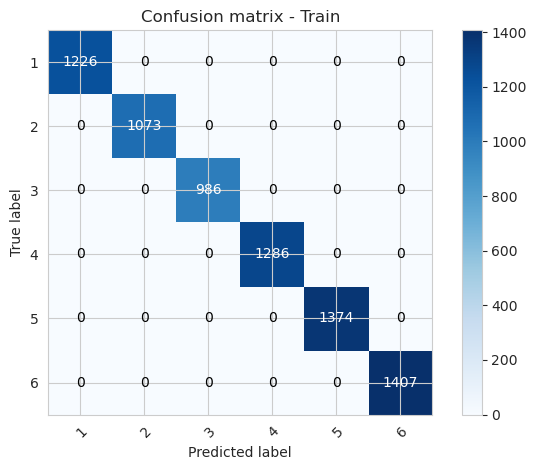

Metrics Cross Validation:
	Accuracy: 0.9294
	Precision: 0.9313
	Recall: 0.9294
	F1 score: 0.9293
	ROC AUC: 0.9959


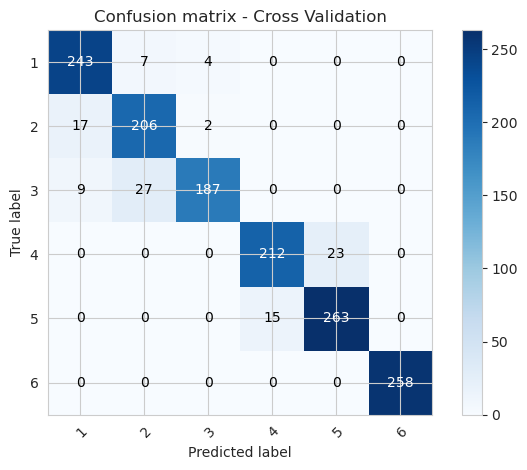

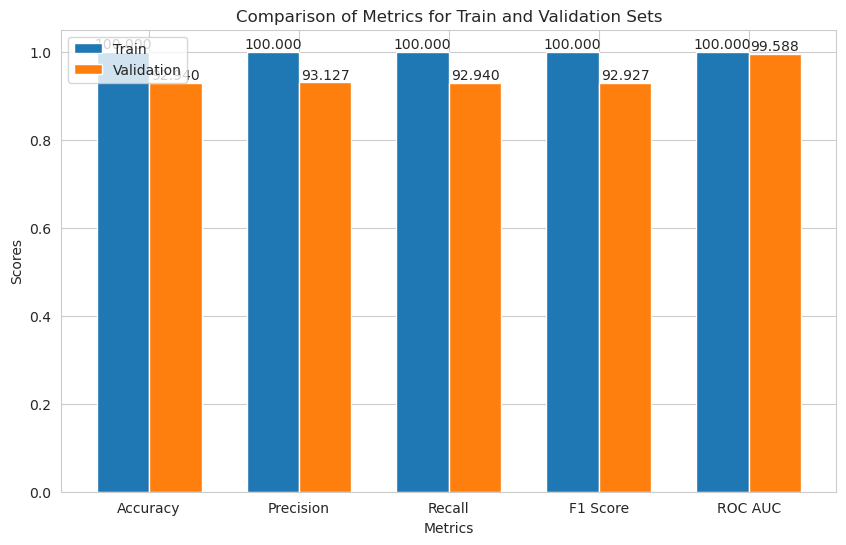

In [24]:
print_metrics(train_y, predictions_train_rf,probabilities_train_rf,"Train")
plot_confusion_matrix(train_y, predictions_train_rf, unique_labels(train_y, predictions_train_rf), title=f'Confusion matrix - Train')

print_metrics(cv_y, predictions_val_rf,probabilities_val_rf,"Cross Validation")
plot_confusion_matrix(cv_y, predictions_val_rf, unique_labels(cv_y, predictions_val_rf), title=f'Confusion matrix - Cross Validation')


plot_metrics_comparison(metrics_train_rf, metrics_val_rf, metric_names)

In [5]:
# Standardize the data
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
cv_X = scaler.transform(cv_X)
test_X = scaler.transform(test_X)

# Apply PCA
pca = PCA(n_components=2)  # Example: Reduce to 2 principal components
train_X_pca = pca.fit_transform(train_X)
cv_X_pca = pca.transform(cv_X)
test_X_pca = pca.transform(test_X)

# Convert arrays to DataFrames for easier handling with pgmpy
train_X_pca_df = pd.DataFrame(train_X_pca, columns=[f'PC{i+1}' for i in range(train_X_pca.shape[1])])
cv_X_pca_df = pd.DataFrame(cv_X_pca, columns=[f'PC{i+1}' for i in range(cv_X_pca.shape[1])])
test_X_pca_df = pd.DataFrame(test_X_pca, columns=[f'PC{i+1}' for i in range(test_X_pca.shape[1])])

# Combine train_X_pca_df and train_y for model training
train_data = pd.concat([train_X_pca_df, pd.Series(train_y, name='Class')], axis=1)

# Define the structure of the Bayesian Network
model = BayesianNetwork([('PC1', 'Class'), ('PC2', 'Class')])

# Learn the parameters of the Bayesian Network using Maximum Likelihood Estimation
model.fit(train_data, estimator=MaximumLikelihoodEstimator)

# Perform inference on cv_X_pca
cv_predictions = model.predict(cv_X_pca_df)



NameError: name 'train_X' is not defined

In [ ]:
# Evaluate the predictions
accuracy = accuracy_score(cv_y, cv_predictions)
precision = precision_score(cv_y, cv_predictions, average='weighted')
recall = recall_score(cv_y, cv_predictions, average='weighted')
f1 = f1_score(cv_y, cv_predictions, average='weighted')

# For ROC AUC, convert cv_y to binary format since roc_auc_score doesn't support multiclass directly
cv_y_binary = np.where(cv_y == 1, 1, 0)  # Assuming 'WALKING' as positive class
cv_predictions_binary = np.where(cv_predictions == 1, 1, 0)
roc_auc = roc_auc_score(cv_y_binary, cv_predictions_binary)

# Confusion Matrix
cm = confusion_matrix(cv_y, cv_predictions)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)

# Perform inference on test_X_pca
test_predictions = model.predict(test_X_pca_df)

# Evaluate the predictions on test set
test_accuracy = accuracy_score(test_y, test_predictions)
precision_test = precision_score(test_y, test_predictions, average='weighted')
recall_test = recall_score(test_y, test_predictions, average='weighted')
f1_test = f1_score(test_y, test_predictions, average='weighted')

# For ROC AUC on test set
test_y_binary = np.where(test_y == 1, 1, 0)
test_predictions_binary = np.where(test_predictions == 1, 1, 0)
roc_auc_test = roc_auc_score(test_y_binary, test_predictions_binary)

# Confusion Matrix for test set
cm_test = confusion_matrix(test_y, test_predictions)

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test Recall: {recall_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Test Confusion Matrix:")
print(cm_test)